In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [ ]:
from scikitplot import clustering_factory
from scikitplot import classifier_factory
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

In [4]:
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 14)

Populating the interactive namespace from numpy and matplotlib


In [2]:
def predict_result(clf,X_test):
    Y_pred=clf.predict(X_test)
    res_file=open('result.csv', 'w')
    for y_item in Y_pred:
      res_file.write("%s\n" % y_item)
    res_file.close()

In [102]:
X=pd.read_csv('x_train.csv',delimiter=";",header=None,names=['f'+str(i) for i in range (223)])
y=pd.read_csv('y_train.csv',names=['class'])
y=y['class']
X_true=pd.read_csv('x_test.csv',delimiter=";",header=None,names=['f'+str(i) for i in range (223)])

In [115]:
best_cols=['f138', 'f96', 'f76', 'f11', 'f185', 'f115','f131', 'f83']

In [114]:
rf=RandomForestClassifier(max_features='auto',n_estimators=300,max_depth=100,random_state=42)
print (np.mean(cross_val_score(rf, X[best_cols], y, cv=5)))
# 0.634280777033   ,class_weight="balanced"
# 0.630569809507

0.630569809507


In [89]:
def vote_classifier(clf_list,XTrain,YTrain,XTest):
    pp_list=list()
    for clf in clf_list:
        clf.fit(XTrain,YTrain)
        pp_list.append(clf.predict_proba(XTest))
    pred_proba=1
    for pp in pp_list:
        pred_proba=pp*pred_proba
    return np.argmax(pred_proba,axis=1)

In [116]:
rf1=RandomForestClassifier(max_features='auto',n_estimators=300,max_depth=100,random_state=1,class_weight='balanced')
rf2=RandomForestClassifier(max_features='auto',n_estimators=300,max_depth=100,random_state=2,class_weight='balanced')
rf3=RandomForestClassifier(max_features='auto',n_estimators=300,max_depth=100,random_state=0,class_weight='balanced')
X_train, X_test, y_train, y_test = train_test_split(X[best_cols], y, test_size=0.33, random_state=42)
clf_list=[rf1,rf2,rf3]
ypred=vote_classifier(clf_list,X_train,y_train,X_test)
print (accuracy_score(y_test,ypred))

0.641493055556


In [70]:
# 0.644097222222 [rf1]
# 0.644965277778 [rf1,rf2] 
# 0.642361111111 [rf1,rf2,rf0]
# balanced
# 0.647569444444 [rf1]
# 0.641493055556
# 0.641493055556 [rf1,rf2,rf0]

0.631944444444


In [108]:
rf1=RandomForestClassifier(max_features='auto',n_estimators=300,max_depth=100,random_state=1)#,class_weight='balanced')
rf2=RandomForestClassifier(max_features='auto',n_estimators=300,max_depth=100,random_state=2)#,class_weight='balanced')
rf3=RandomForestClassifier(max_features='auto',n_estimators=300,max_depth=100,random_state=0)#,class_weight='balanced')
clf_list=[rf1,rf2,rf3]
Y_pred=vote_classifier(clf_list,X[best_cols],y,X_true[best_cols])

In [106]:
Y_pred

array([2, 1, 2, ..., 3, 2, 1], dtype=int64)

In [109]:
res_file=open('result.csv', 'w')
for y_item in Y_pred:
    res_file.write("%s\n" % y_item)
res_file.close()

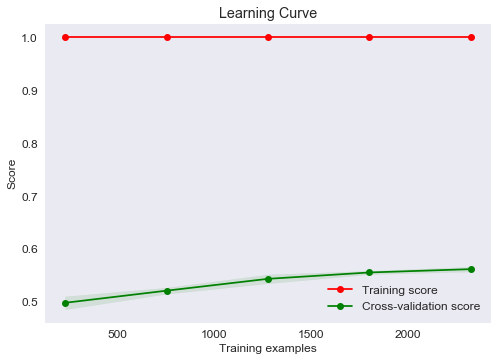

In [5]:
cf = classifier_factory(rf)
cf.plot_learning_curve(X, y)
plt.show()


D:\Anaconda3\lib\site-packages\scikitplot\classifiers.py:51: UserWarning: "plot_precision_recall_curve" method already in clf. Overriding anyway. This may result in unintended behavior.
  'Overriding anyway. This may result in unintended behavior.'.format(key))
D:\Anaconda3\lib\site-packages\scikitplot\classifiers.py:51: UserWarning: "plot_confusion_matrix" method already in clf. Overriding anyway. This may result in unintended behavior.
  'Overriding anyway. This may result in unintended behavior.'.format(key))
D:\Anaconda3\lib\site-packages\scikitplot\classifiers.py:51: UserWarning: "plot_ks_statistic" method already in clf. Overriding anyway. This may result in unintended behavior.
  'Overriding anyway. This may result in unintended behavior.'.format(key))
D:\Anaconda3\lib\site-packages\scikitplot\classifiers.py:51: UserWarning: "plot_learning_curve" method already in clf. Overriding anyway. This may result in unintended behavior.
  'Overriding anyway. This may result in unintended 

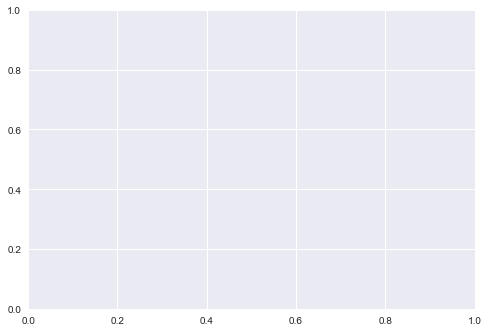

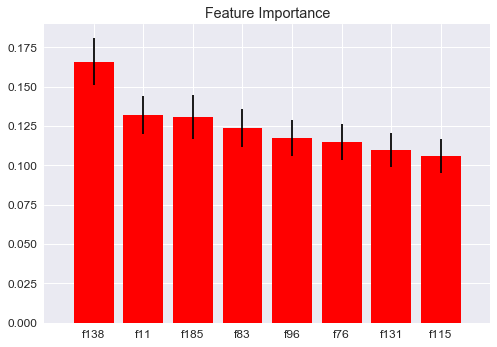

In [14]:
cf1= classifier_factory(rf)
cf1.fit(X[best_cols], y)
cf1.plot_feature_importances(feature_names=best_cols)
plt.show()

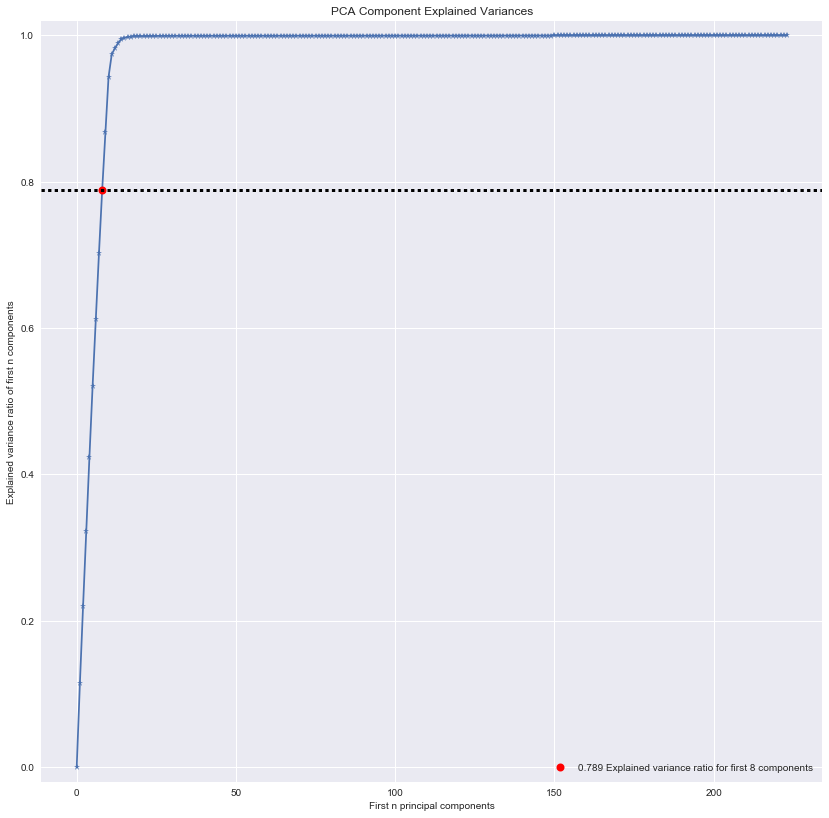

In [20]:
pca = PCA(random_state=1)
pca.fit(X)
skplt.plot_pca_component_variance(pca)
plt.show()

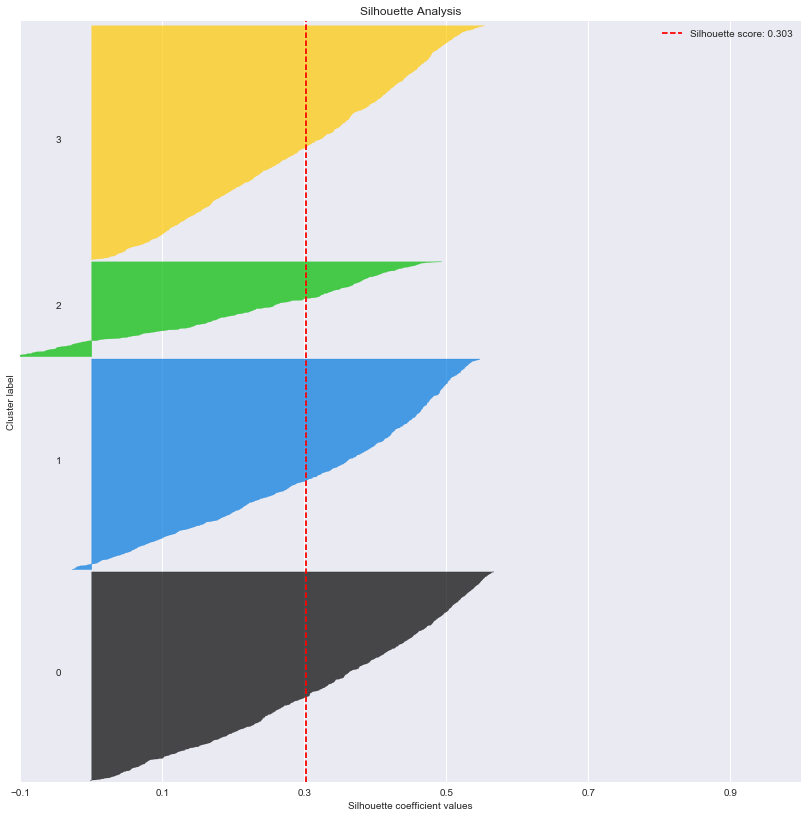

In [26]:
kmeans = clustering_factory(KMeans(n_clusters=4, random_state=1))
kmeans.plot_silhouette(X[best_cols])
plt.show()